# Fitness Class Attention

**Problem** : Many membors reserved a class but didn't attend.

**Requirement** : Predict new incoming booking whether membor will attend or not.

**Business outcome** : Fitness can serve their class to more customers. More membors in a class, more impressive, better experience.

This notebook will show :
1. Some insights that probably be helpful.
2. Maching learning model to predict whether membor will join the class or not.

In [1]:
#import module
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

**Import raw data (local file)**

In [19]:
file_path = '/Users/User/Documents/GitHub/project/Fitness Attention Prediction/fitness_class_2212.csv'
data = pd.read_csv(file_path)

In [90]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [92]:
data.set_index('booking_id', inplace = True)

In [94]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


-----------------------------------------------------------------------------

### Preprocessing Data

Do a little missing data check up!

In [64]:
data.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

There is only 20 NA values in weight columns from all 1500 rows. So, I decided to drop all missing values.

In [81]:
data = data.dropna()

In [84]:
data.duplicated().sum()

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1480 non-null   int64   
 1   months_as_member  1480 non-null   int64   
 2   weight            1480 non-null   float64 
 3   days_before       1480 non-null   int32   
 4   day_of_week       1480 non-null   category
 5   time              1480 non-null   object  
 6   category          1480 non-null   object  
 7   attended          1480 non-null   int64   
dtypes: category(1), float64(1), int32(1), int64(3), object(2)
memory usage: 88.5+ KB


In [21]:
data.days_before.value_counts()

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64

There are some excess words in data. So, it should be trimmed out then convert them to integer.

In [22]:
data['days_before'] = data.days_before.str.strip(' days').astype('int')
data.days_before.value_counts()

10    299
2     200
8     195
12    181
14    175
4     157
6      73
7      39
3      32
5      31
13     26
11     26
9      24
15     24
1      10
16      3
17      3
20      1
29      1
Name: days_before, dtype: int64

That's what we want!
Let's check the next one, day_of_week.

In [29]:
data.day_of_week.value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

There are some exceed categories which are duplicated with other. Let's change them to the right one.

In [24]:
mapping = {'Fri.':'Fri', 'Wednesday':'Wed', 'Monday':'Mon'}
data['day_of_week'] = data.day_of_week.replace(mapping, regex = True)

In [25]:
data.day_of_week.value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

Great!
Then, it will be great if 'day_of_week' feature is sortable. It makes me easier for data visualization.

In [30]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data.day_of_week = pd.Categorical(data.day_of_week, categories = days)

In [31]:
data.time.value_counts()

AM    1141
PM     359
Name: time, dtype: int64

In [32]:
data.category.value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [33]:
data.attended.value_counts()

0    1046
1     454
Name: attended, dtype: int64

In [95]:
data.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,,,,,,,
1,17,79.56,8,Wed,PM,Strength,0
2,10,79.01,2,Mon,AM,HIIT,0
3,16,74.53,14,Sun,AM,Strength,0
4,5,86.12,10,Fri,AM,Cycling,0
5,15,69.29,8,Thu,AM,HIIT,0


### Exploratory Data Analysis

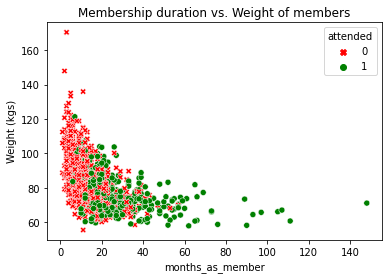

In [55]:
markers = {1: "o", 0 : "X"}
sns.scatterplot(data = data, x = 'months_as_member', y = 'weight', hue = 'attended', palette=['red', 'green'], markers = markers, style = 'attended')
plt.title('Membership duration vs. Weight of members')
plt.ylabel('Weight (kgs)')
plt.show()

**INSIGHT :** Membors who have been in memborship longer and has less weight tend to attend their booked class more often, **significantly**.

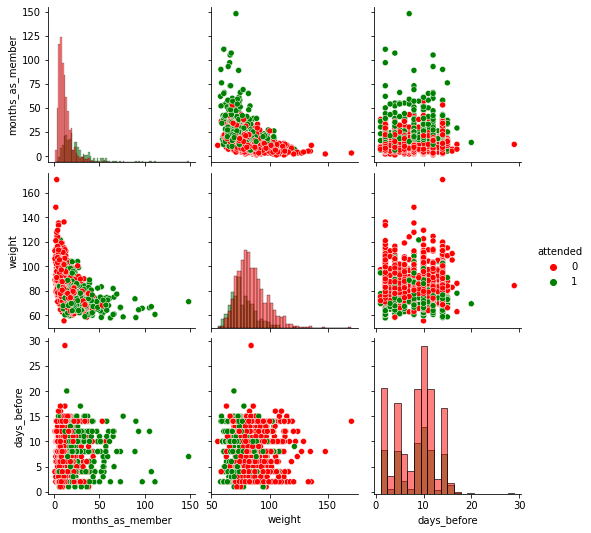

In [103]:
sns.pairplot(data = data, diag_kind = 'hist',hue = 'attended', palette=['red', 'green'])
plt.show()

<AxesSubplot:xlabel='category', ylabel='count'>

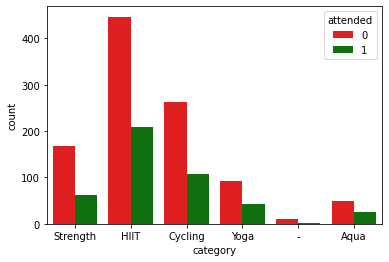

In [118]:
sns.countplot(data = data, x = 'category', hue = 'attended', palette= ['red', 'green'])

<AxesSubplot:xlabel='category,attended'>

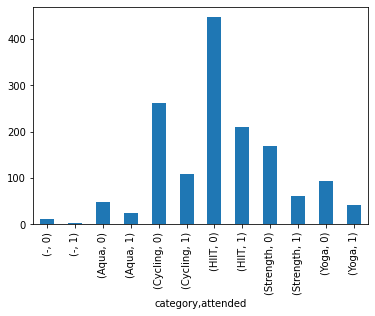

In [124]:
data.sort_values('category').groupby('category')['attended'].value_counts().plot.bar()